This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformed import InversePhysicsInformedBarModel # py file which has custom class defined
import torch
import matplotlib.pyplot as plt

Custom function needed to generate training and testing data

In [2]:
def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

2. Analytical 'u' is given

In [3]:
L = 1
x = generate_grid_1d(L, 20)
u_analytic = lambda x: torch.sin(2*torch.pi*x)
u = u_analytic(x)

Analytical inverse solution for validation

In [4]:
EA_analytic = lambda x: x**3 - x**2 + 1

3. Problem data are defined. Here the known data like boundary condition and loading conditions are defined

In [5]:
distLoad = lambda x: -2*(3*x**2 - 2*x)*torch.pi*torch.cos(2*torch.pi*x) + 4*(x**3 - x**2 + 1)*torch.pi**2*torch.sin(2*torch.pi*x)

4. Next we generate the neural network model using the imported class InversePhysicsInformedBarModel

In [6]:
pinnModel = InversePhysicsInformedBarModel(x, u, L, distLoad) # custom class defined in physicsinformed.py file

5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [7]:
epochs = 150
learningRate = 1e-3

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate) # function defined in custom class for training

epoch 0/150, Total loss 53.0459098815918
epoch 20/150, Total loss 3.791773557662964
epoch 40/150, Total loss 0.031340405344963074
epoch 60/150, Total loss 0.0021480147261172533
epoch 80/150, Total loss 3.227963316021487e-05
epoch 100/150, Total loss 2.8562411898747087e-05
epoch 120/150, Total loss 2.8500600819825195e-05
epoch 140/150, Total loss 2.847275754902512e-05


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [8]:
samples = 100
x_test = generate_grid_1d(L, samples)
u_test = u_analytic(x_test)
EA_test = pinnModel.predict(x_test,u_test) # function defined in custom class for predicting EA values

7. We plot predicted coefficient (EA) at test points and also the training history

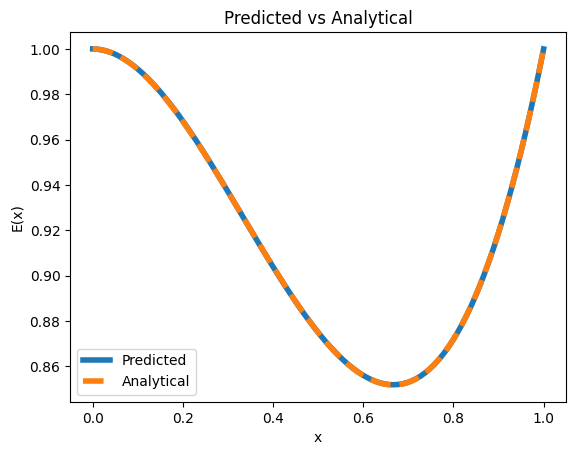

In [9]:
# plot the results and training losses. Refer the pptx file results slide for more information
plt.plot(x_test.detach().numpy(), EA_test.detach().numpy(), label='Predicted', lw=4)
plt.plot(x_test.detach().numpy(), EA_analytic(x_test.detach().numpy()), label='Analytical', linestyle='--', lw=4)
plt.legend()
plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('Predicted vs Analytical')
plt.savefig("../figures/0201.png")

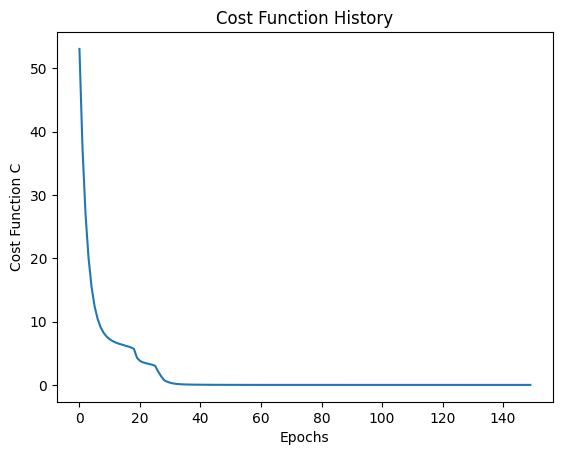

In [10]:
# plot the training loss
plt.plot(pinnModel.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Cost Function C')
plt.title('Cost Function History')
plt.savefig("../figures/0202.png")